In [1]:
cd ..

C:\Users\Admin\Desktop\Investigacion\Systems\SystemDB\tools


In [2]:
cd ..

C:\Users\Admin\Desktop\Investigacion\Systems\SystemDB


# Conectar bases de datos del scrap

In [3]:
from MySQLdb import _mysql
from dotenv import load_dotenv
import sys
#sys.path.insert(0, '../')
from redirect import redirect

class ConnectionDB():
    def __init__(self):
        load_dotenv()
        self.data =redirect()
    
    def connect(self):
        return _mysql.connect(self.data.host, self.data.user,self.data.passw,self.data.names)

In [4]:
import pandas as pd

# Procesar los datos

In [18]:
processQuery = """SELECT  * FROM scraping.articulo inner join revista on revista.idRevista = articulo.idRevista where Fecha >= 2018 ;"""
process = ConnectionDB().connect()
process.query(processQuery)
result=process.use_result().fetch_row(maxrows=0,how=1)
process.close()

In [19]:
processQuery = """SELECT  * FROM revista;"""
process = ConnectionDB().connect()
process.query(processQuery)
result2=process.use_result().fetch_row(maxrows=0,how=1)
process.close()

In [20]:
processQuery = """SELECT count(idArticulo) FROM scraping.articulo where Fecha >= 2018 
and nombre not  like "%Imag_%" and resumen not like "%Imag_%" and nombre not like "%Mhealth%" and resumen not like "%Mhealth%"
and (
nombre like '%cardio_%' or nombre like '%heart_%'  or nombre like '%Feature selection%' or nombre like '%Natural Language Processing%' or 
nombre like '%Machine%' or nombre like '%deep%' or nombre like '%lear_%' or nombre like '%scien_%' or nombre like '%program_%' or nombre like '%Comput_%' or 
nombre like '%Artifi_%'  or  nombre like '%intelli_%'
) and (
resumen like '%cardio_%' or resumen like '%heart_%'  or resumen like '%Feature selection%' or resumen like '%Natural Language Processing%' or 
resumen like '%Machine%' or resumen like '%deep%' or resumen like '%lear_%' or resumen like '%scien_%' or resumen like '%program_%' or resumen like '%Comput_%' or 
resumen like '%Artifi_%'  or  resumen like '%intelli_%');"""
process = ConnectionDB().connect()
process.query(processQuery)
result3=process.use_result().fetch_row(maxrows=0,how=1)
process.close()


In [21]:
processQuery = """select count(idArticulo) FROM scraping.articulo where  
(resumen like "% framingham %" or  
resumen like "% grace %" or 
resumen like "% procam %" or 
resumen like "% score %" or 
resumen like "% qrisk %" or 
resumen like "% qrisk_2 %" or 
resumen like "% timi score %" or 
resumen like "% timi %" or 
resumen like "% euroscore_1 %" or  
resumen like "% euroscore_2 %" or  
resumen like "%sts score%" or 
resumen like "%ARGSCORE%" or 
resumen like "%logistic euroscore%" or
resumen like "% ACC/AHA %" or
resumen like "% REYNOLDS %" or
resumen like '%maggic score%') and
Fecha >= 2018 
and nombre not  like "%Imag_%" and resumen not like "%Imag_%" and nombre not like "%Mhealth%" and resumen not like "%Mhealth%"
and (
nombre like '%cardio_%' or nombre like '%heart_%'  or nombre like '%Feature selection%' or nombre like '%Natural Language Processing%' or 
nombre like '%Machine%' or nombre like '%deep%' or nombre like '%lear_%' or nombre like '%scien_%' or nombre like '%program_%' or nombre like '%Comput_%' or 
nombre like '%Artifi_%'  or  nombre like '%intelli_%'
) and (
resumen like '%cardio_%' or resumen like '%heart_%'  or resumen like '%Feature selection%' or resumen like '%Natural Language Processing%' or 
resumen like '%Machine%' or resumen like '%deep%' or resumen like '%lear_%' or resumen like '%scien_%' or resumen like '%program_%' or resumen like '%Comput_%' or 
resumen like '%Artifi_%'  or  resumen like '%intelli_%');"""
process = ConnectionDB().connect()
process.query(processQuery)
result4=process.use_result().fetch_row(maxrows=0,how=1)
process.close()


In [22]:
processQuery ="""select count(resumen) as framingham 
,(select count(resumen)  FROM scraping.articulo where  resumen like "% grace %" and Fecha >= 2018 ) as grace
,(select count(resumen)  FROM scraping.articulo where  resumen like "% procam %" and Fecha >= 2018 ) as procam
,(select count(resumen)  FROM scraping.articulo where  resumen like "% euroscore %" and Fecha >= 2018 ) as euroscore
,(select count(resumen)  FROM scraping.articulo where  resumen like "% qrisk %" and Fecha >= 2018 ) as qrisk
,(select count(resumen)  FROM scraping.articulo where  resumen like "%qrisk_2%" and Fecha >= 2018 ) as qrisk_2
,(select count(resumen)  FROM scraping.articulo where  resumen like "%timi score%" and Fecha >= 2018 ) as timi_score
,(select count(resumen)  FROM scraping.articulo where  resumen like "% timi %" and Fecha >= 2018 )  as timi
,(select count(resumen)  FROM scraping.articulo where  resumen like "% euroscore_1 %" and Fecha >= 2018 ) as euroscore_1
,(select count(resumen)  FROM scraping.articulo where  resumen like "% euroscore_2 %" and Fecha >= 2018 ) as euroscore_2
,(select count(resumen)  FROM scraping.articulo where  resumen like "% sts score %" and Fecha >= 2018 ) as sts_score
,(select count(resumen)  FROM scraping.articulo where  resumen like "% ARGSCORE %" and Fecha >= 2018 ) as ARGSCORE
,(select count(resumen)  FROM scraping.articulo where  resumen like "% logistic euroscore %" and Fecha >= 2018 ) as logistic_euroscore
,(select count(resumen)  FROM scraping.articulo where  resumen like "% maggic %" and Fecha >= 2018 ) as maggic_score
,(select count(resumen)  FROM scraping.articulo where  resumen like "% REYNOLDS %" and Fecha >= 2018 ) as REYNOLDS
,(select count(resumen)  FROM scraping.articulo where  resumen like "% ACC/AHA %" and Fecha >= 2018 ) as ACCAHA
,(select count(resumen)  FROM scraping.articulo where  resumen like "%AHA %" and Fecha >= 2018 ) as AHA
FROM scraping.articulo where  resumen like "% framingham %" and Fecha >= 2018; """
process = ConnectionDB().connect()
process.query(processQuery)
result5=process.use_result().fetch_row(maxrows=0,how=1)
process.close()

In [23]:
from pandas import json_normalize
import numpy as np
df_car =json_normalize(result5)
# Transform data
for col in df_car.columns:
    for i in range(df_car.shape[0]):
        df_car.loc[i,col]=df_car.loc[i,col].decode(encoding="utf-8")

df_car = df_car.astype(int).T.sort_values(0,ascending=True)

In [24]:
df_carRevista2 =json_normalize(result4)
# Transform data
for col in df_carRevista2.columns:
    for i in range(df_carRevista2.shape[0]):
        df_carRevista2.loc[i,col]=df_carRevista2.loc[i,col].decode(encoding="utf-8")
df_carRevista2["nombre"] ="CANTIDAD DE ARTICULOS QUE HABLAN O TRATAN SOBRE ENFERMEDADES CARDIOVASCULARES , MODELOS DE RIESGO e inteligencia artificial"

In [25]:
from pandas import json_normalize
import numpy as np
df =json_normalize(result)
# Transform data
for col in df.columns:
    for i in range(df.shape[0]):
        df.loc[i,col]=df.loc[i,col].decode(encoding="utf-8")


In [26]:
df_revista =json_normalize(result2)
# Transform data
for col in df_revista.columns:
    for i in range(df_revista.shape[0]):
        df_revista.loc[i,col]=df_revista.loc[i,col].decode(encoding="utf-8")

In [27]:
df_carRevista =json_normalize(result3)
# Transform data
for col in df_carRevista.columns:
    for i in range(df_carRevista.shape[0]):
        df_carRevista.loc[i,col]=df_carRevista.loc[i,col].decode(encoding="utf-8")
df_carRevista["nombre"] ="CANTIDAD DE ARTICULOS QUE HABLAN O TRATAN SOBRE ENFERMEDADES CARDIOVASCULARES e inteligencia artificial"

In [28]:
df_final = df_carRevista.append(df_carRevista2, ignore_index=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_10124\1111646734.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_final = df_carRevista.append(df_carRevista2, ignore_index=True)


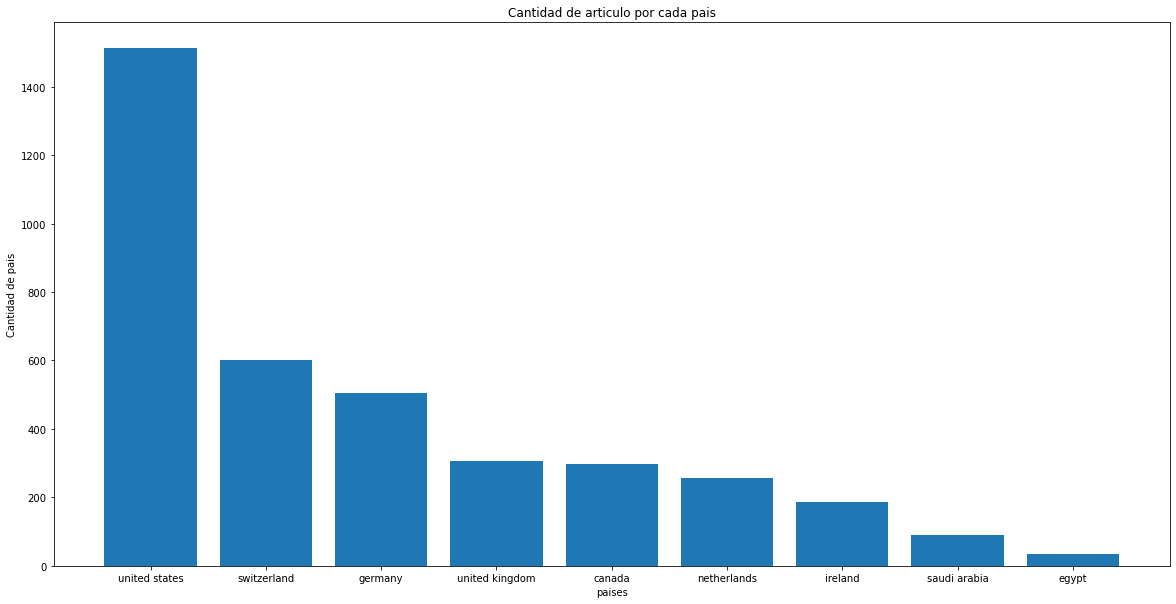

In [117]:
plt.figure(figsize=(20,10))
plt.title("Cantidad de articulo por cada pais")
plt.xlabel("paises")
plt.ylabel("Cantidad de pais")
plt.bar(df["country"].value_counts().index,df["country"].value_counts().values)
plt.show() # no necesariamente en Jupyter Notebooks

In [410]:
dfrrss_sort["country"].value_counts()

united states     1513
switzerland        600
germany            504
united kingdom     307
canada             297
netherlands        257
ireland            187
saudi arabia        89
egypt               30
Name: country, dtype: int64

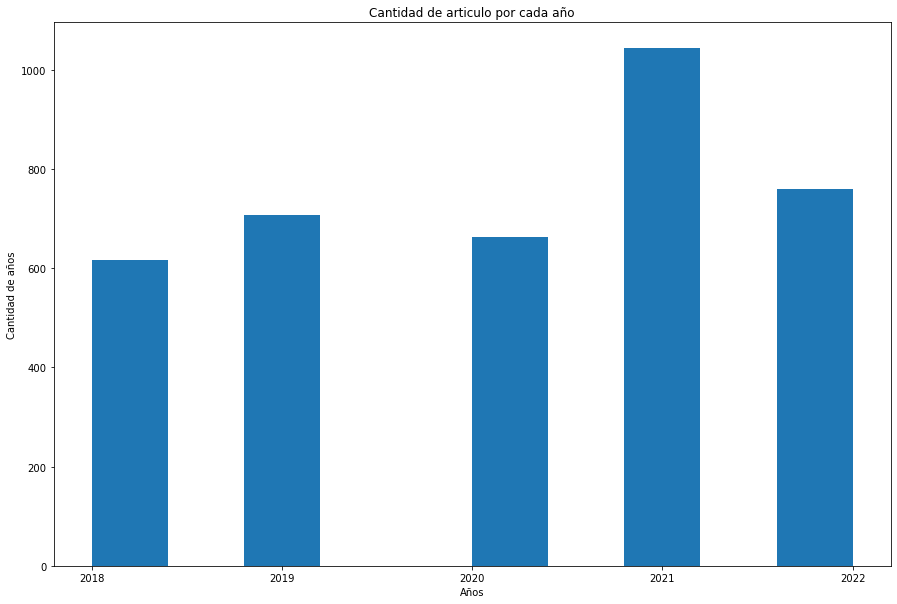

In [31]:
plt.figure(figsize=(15,10))
plt.title("Cantidad de articulo por cada año")
plt.xlabel("Años")
plt.ylabel("Cantidad de años")
dfrrss_sort = df.sort_values("Fecha",ascending=True)
plt.hist(dfrrss_sort["Fecha"])
plt.show() # no necesariamente en Jupyter Notebooks

2426

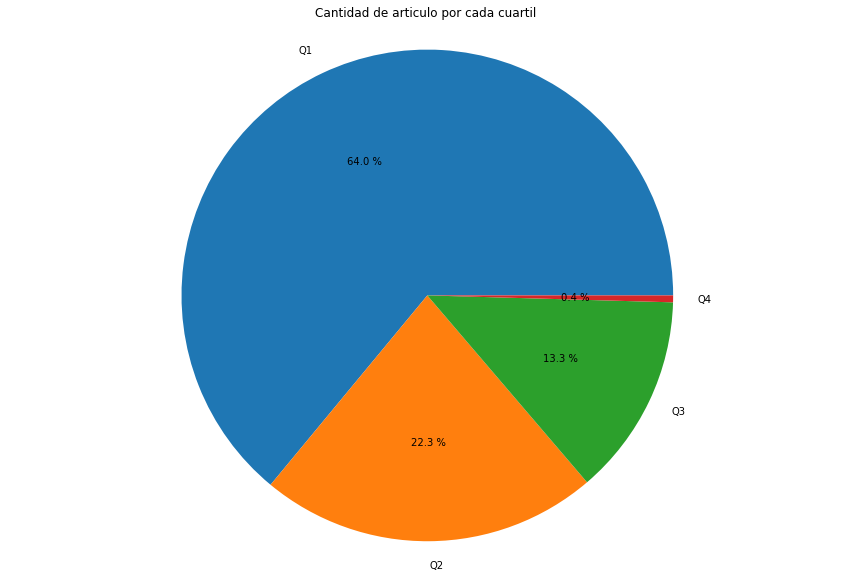

In [50]:
manzanas = dfrrss_sort["Q"].value_counts()
nombres = dfrrss_sort["Q"].unique()
plt.figure(figsize=(15,10))
plt.pie(manzanas, labels=nombres, autopct="%0.1f %%")
plt.title("Cantidad de articulo por cada cuartil")
plt.axis("equal")
plt.show()

In [126]:
df_revista["total"].values

array([40, 20, 112, 35, 88, 24, '', 9, 12, 601, 61, 4, 7, 115, '', '',
       140, 52, 66, 44, 14, 87, 134, 157, 670, 242, 504, 81, 89, 16, 297,
       66, 3, '', 1, ''], dtype=object)

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int32'), dtype('<U1')) -> None

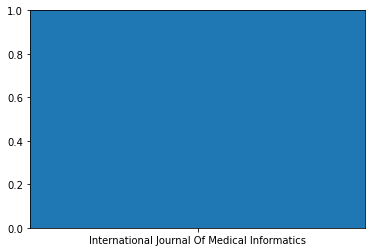

In [125]:
for sh in range(df_revista.shape[0]):
    count = 0 
    for i in dfrrss_sort["revista.idRevista"].value_counts().index:
        if i ==df_revista.loc[sh,"idRevista"]:
            df_revista.loc[sh,"total"]= dfrrss_sort["revista.idRevista"].value_counts()[count]
        count = count+1 
df_revista[["nombre","total"]]
plt.bar(df_revista["nombre"].values,df_revista["total"].values)
plt.show() # no necesariamente en Jupyter Notebooks
# colocar la cantidad de la tabla y organizarla de mayor a menor
#la grafica sale 

In [100]:
df_final["count(idArticulo)"]

1     18
0    963
Name: count(idArticulo), dtype: object

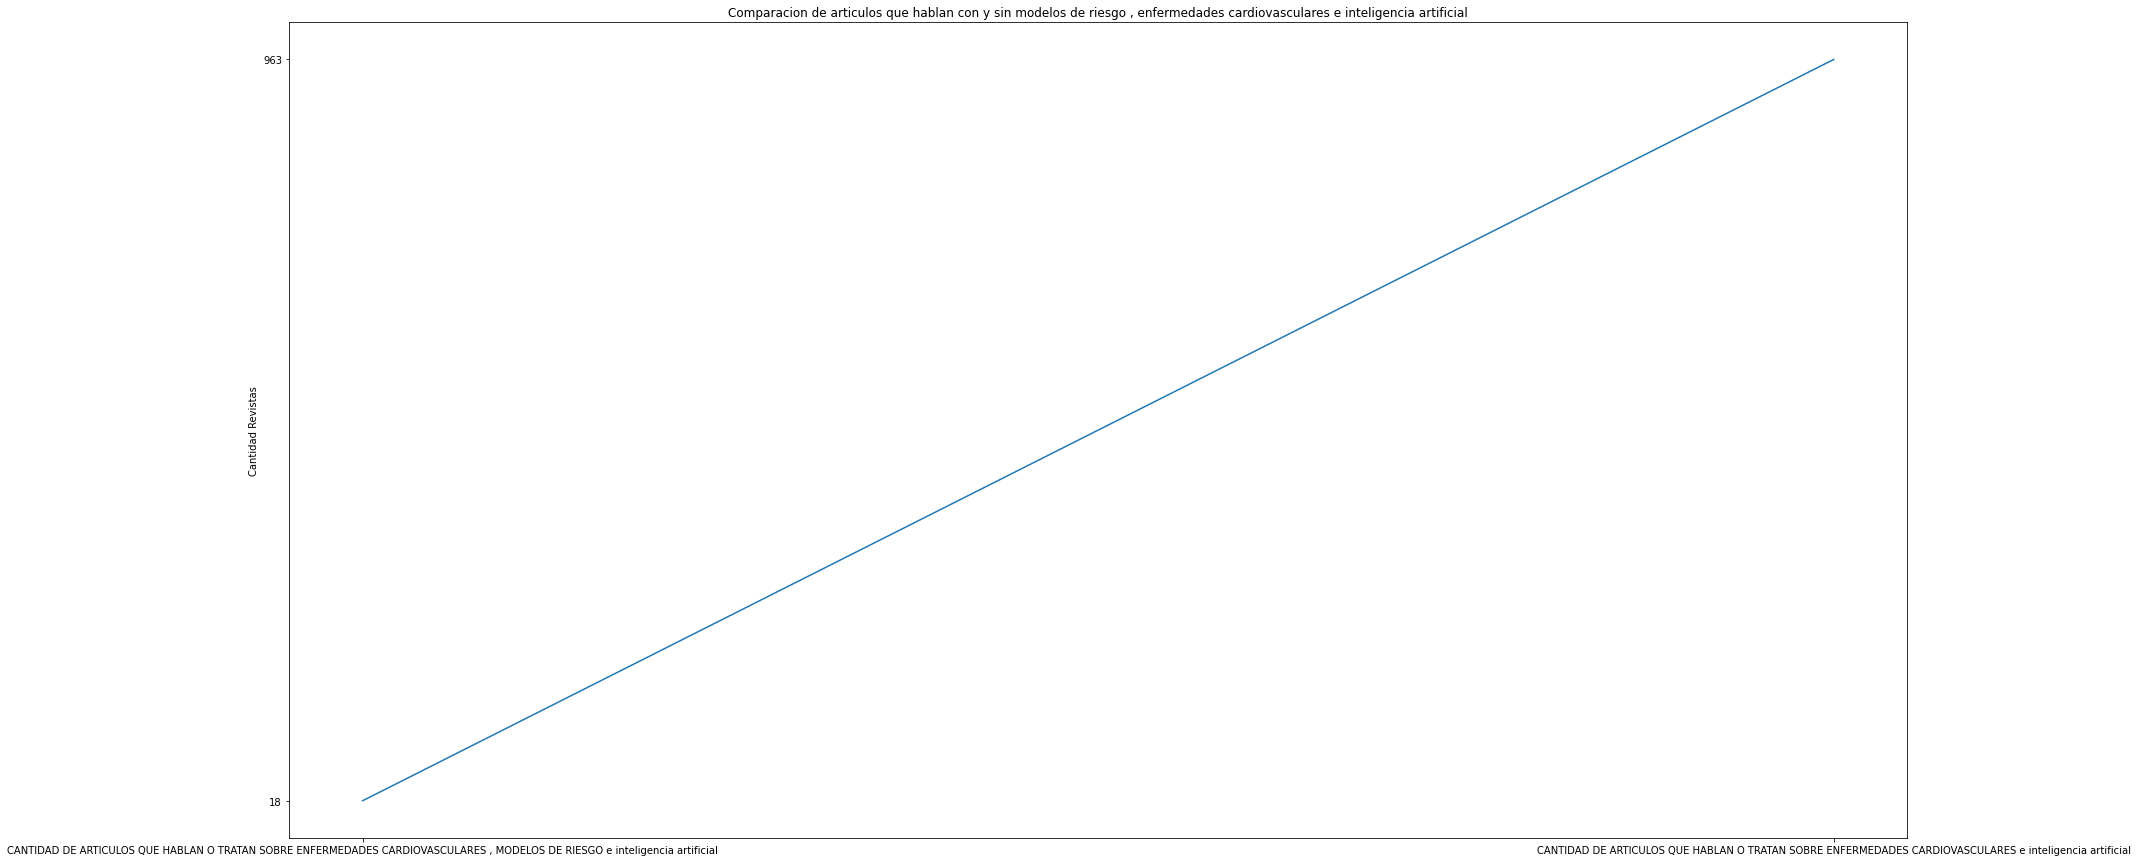

In [104]:

plt.figure(figsize=(29,15))
plt.title("Comparacion de articulos que hablan con y sin modelos de riesgo , enfermedades cardiovasculares e inteligencia artificial")
plt.ylabel("Cantidad Revistas")
plt.plot(df_final["nombre"],df_final["count(idArticulo)"])


plt.show() # no necesariamente en Jupyter Notebooks
#torta

<BarContainer object of 17 artists>

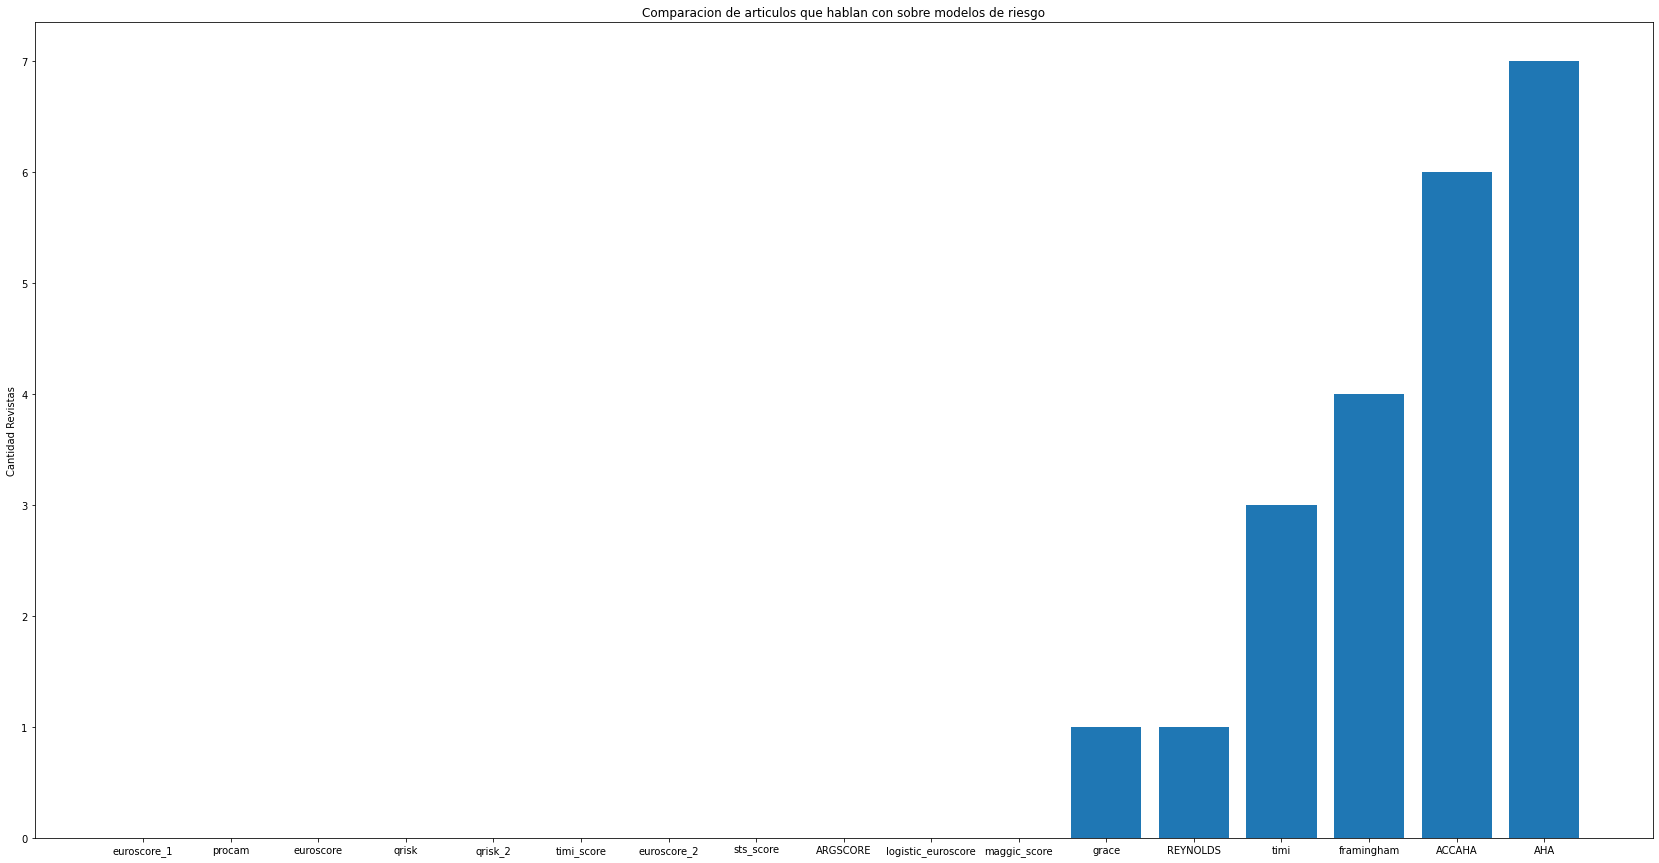

In [105]:
plt.figure(figsize=(29,15))
plt.title("Comparacion de articulos que hablan con sobre modelos de riesgo")
plt.ylabel("Cantidad Revistas")
plt.bar(df_car.index,df_car[0])